In [1]:
from model import ECModel
from trainer_heanet_mtl import load_mp_data
from trainer_heanet_mtl_HEA import load_hea_data_single_file
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import seaborn as sns
from matplotlib.ticker import MultipleLocator, AutoLocator, MaxNLocator
import os

task_dict = {'etot': 'Etot (eV/atom)',
             'etot_all': 'Etot (eV)',
             'emix': 'Emix (eV/atom)',
             'eform': 'Eform (eV/atom)',
             'ms': 'Ms ($\mu_b$/atom)',
             'ms_all': 'Ms (emu/g)',
             'mb': 'mb ($\mu_b$/cell)',
             'rmsd': r'RMSD ($\AA$)',
             }

In [2]:
def evaluate_model_hea(tasks, transform, model_name, data_split_type=2):
    """
    The brief function to test our models. All the other parameters are default ones.
    :param data_split_type: int
    :param tasks: list of str
    :param transform: list of str
    :param model_name: str
    :return:
    """
    ecmodel = ECModel(tasks=tasks, transform=transform)
    ecmodel.init_model(num_tasks=len(tasks))
    ecmodel.load_model(model_name=model_name)
    train_loader, validate_loader, test_loader = load_hea_data_single_file(split_type=data_split_type, is_validate=True)
    out_true, out_pred = ecmodel.test(test_loader=test_loader)
    out_true_train, out_pred_train = ecmodel.test(test_loader=train_loader)
    return out_true, out_pred,out_true_train, out_pred_train 

In [3]:
def evaluate_etot_emix_ef():
    tasks = ['etot', 'emix', 'eform']
    transform = []
    model_name = './saved_models_mtl_HEA/mtl_3_etot_emix_ef_HEA_500_b2.pt'
    data_split_type = 2
    out_true, out_pred,out_true_train, out_pred_train   = evaluate_model_hea(tasks=tasks, transform=transform,
                                            model_name=model_name, data_split_type=data_split_type)
    return out_true, out_pred, out_pred_train, out_true_train 
def evaluate_ms_mb():
    tasks = tasks = ['ms', 'mb']
    transform = []
    model_name = './saved_models_mtl_HEA/mtl_2_ms_mb_HEA_500_b2.pt'
    data_split_type = 2
    out_true, out_pred,out_true_train, out_pred_train  = evaluate_model_hea(tasks=tasks, transform=transform,
                                            model_name=model_name, data_split_type=data_split_type)
    return out_true, out_pred, out_pred_train, out_true_train 
def evaluate_rmsd():
    tasks = tasks = ['rmsd']
    transform = []
    model_name = './saved_models_mtl_HEA/mtl_1_rmsd_HEA_500_b2.pt'
    data_split_type = 2
    out_true, out_pred,out_true_train, out_pred_train   = evaluate_model_hea(tasks=tasks, transform=transform,
                                            model_name=model_name, data_split_type=data_split_type)
    return out_true, out_pred, out_pred_train, out_true_train 

In [29]:
num_base = {'etot': 1,
             'etot_all': 200,
             'emix': 0.05,
             'eform':0.1,
             'ms': 1,
             'ms_all':1,
             'mb': 1,
             'rmsd':1,
             }

binwidth_dict = {
             'etot': 1.0,
             'etot_all': 200,
             'emix': 0.1,
             'eform':0.05,
             'ms': 0.5,
             'ms_all':1,
             'mb': 10,
             'rmsd':0.2,
             }

In [30]:


def scatter_hist(x, y, x_train=None, y_train=None, r2_s=None, mae_s=None, task=None, fig_path='./', **kwargs):
    # definitions for the axes
    left, width = 0.1, 0.72
    bottom, height = 0.1, 0.72
    spacing = 0.005
    xy_label_fontsize = 25
    tick_label_size = 20
    legend_font_size = 20
    note_size = 20
    note_x, note_y = 0.2, 0.7
    
    property = '$E_{mix}$ (eV/atom)'
    if task:
        if task in task_dict.keys():
            property = task_dict[task]
        else:
            pass
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.13]
    rect_histy = [left + width + spacing, bottom, 0.13, height]

    # start with a rectangular Figure
    plt.figure(figsize=(8, 8), dpi=400)

    # Etot_all 200
    # Etot :1
    base = 30
    base = num_base.get(task)
    xmajorLocator = MaxNLocator(nbins=5)
    #     xmajorLocator = AutoLocator(5) 
    #     xmajorLocator = MultipleLocator(base=base)

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.set_xlabel('Calculated {}'.format(property),
                          fontdict={'family': 'Times New Roman', 'size': xy_label_fontsize})
    ax_scatter.set_ylabel('Predicted {}'.format(property),
                          fontdict={'family': 'Times New Roman', 'size': xy_label_fontsize})
    ax_scatter.tick_params(direction='in', top=True, right=True, labelsize=tick_label_size, size=5)
    ax_scatter.xaxis.set_major_locator(xmajorLocator)
    ax_scatter.yaxis.set_major_locator(xmajorLocator)
    labels = ax_scatter.get_xticklabels() + ax_scatter.get_yticklabels()
    [label.set_fontname('Times New Roman') for label in labels]

    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False)

    # #b2b2b6(灰色), #90a0c7, #A5C8E1
    s1 = ax_scatter.scatter(x_train, y_train, edgecolors='#A5C8E1', linewidths=0.1, color='#A5C8E1')

    # the scatter plot:
    s2 = ax_scatter.scatter(x, y, edgecolors='darkorange', linewidths=0.1, color='darkorange', alpha=0.95)

    ax_scatter.legend([s1, s2], ('Train', 'Test'), loc="upper left", fontsize=legend_font_size, frameon=False)
    # sandybrown
    # now determine nice limits by hand:
    #     binwidth = 0.25
    #     if task=='emix' or 'eform':
    #         binwidth = 0.1
    binwidth = binwidth_dict.get(task)
    print('binwidth is {}'.format(binwidth))
    
    max_test = np.array([x, y]).max()
    max_train = np.array([x_train, y_train]).max()
    l_lim = np.floor(np.array([x, y]).min() / binwidth) * binwidth - 2 * binwidth
    r_lim = np.ceil( max(max_test, max_train) / binwidth) * binwidth + 2 * binwidth
    print('l_lim {}, r_lim {}'.format(l_lim, r_lim))
    ax_scatter.set_xlim((l_lim, r_lim))
    ax_scatter.set_ylim((l_lim, r_lim))
    ax_scatter.grid(linestyle='-.', alpha=.45)
    ax_scatter.set_axisbelow(True)
    # plot the ypred=ytest dashed line.
    # equal_x = np.arange(l_lim, r_lim, 0.1)
    equal_x = np.linspace(l_lim, r_lim, 50, endpoint=True)
    ax_scatter.plot(equal_x, equal_x, color='k', linestyle='dashed', linewidth=1, markersize=1)
    # ax_scatter.grid(linestyle='--')


    ## kdeplot at the upper and right side of the main figure.
    sns.kdeplot(data=x, fill=True, common_norm=False, alpha=.5, linewidth=0, ax=ax_histx)
    #     sns.distplot(x, bins=bins, hist=False, kde=True, ax=ax_histx)
    sns.kdeplot(data=x_train, fill=True, common_norm=False, alpha=.5, linewidth=0, ax=ax_histx)
    #     sns.distplot(x_train, bins=bins, hist=False, kde=True, ax=ax_histx)
    # ax_histx.hist(x, bins=bins, histtype='stepfilled',color='#b2b2b6',alpha=0.7)
    ax_histx.axis('off')

    sns.kdeplot(y=y, fill=True, common_norm=False, alpha=.5, linewidth=0, ax=ax_histy, vertical=False)
    sns.kdeplot(y=y_train, fill=True, common_norm=False, alpha=.5, linewidth=0, ax=ax_histy, vertical=False)

    #     sns.distplot(y, bins=bins, hist=True, kde=True, ax=ax_histy, vertical=True)
    #     sns.distplot(y_train, bins=bins, hist=True, kde=True, ax=ax_histy, vertical=True)
    # ax_histy.hist(y, bins=bins, orientation='horizontal',alpha=0.7,color='#b2b2b6')
    ax_histy.axis('off')

    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())
    #     if r2_s and mae_s:
    #         plt.text(x=note_x, y=note_y, s='$R^2$={:.3f} \nMAE={:.3f}'.format(r2_s, mae_s), fontdict={'family': 'Times New Roman', 'size': note_size}
    #              , transform=ax_scatter.transAxes)

    fig_name = kwargs.get('fig_name')
    if fig_name:
        plt.savefig(os.path.join(fig_path, fig_name), format='png', bbox_inches='tight')
    plt.show()

In [31]:
import matplotlib.pyplot as plt


def plot_scatter(tasks, out_true, out_pred,out_true_train, out_pred_train ):
    for i in range(len(tasks)):
        mae_s = mean_absolute_error(out_true[i], out_pred[i])
        r2_s = r2_score(out_true[i], out_pred[i])
        out_pred[i] = np.squeeze(out_pred[i])
        out_pred_train[i] = np.squeeze(out_pred_train[i])
        scatter_hist(out_true[i], out_pred[i], out_true_train[i], out_pred_train[i], task=tasks[i], fig_path='./fig/performance',
                     r2_s=r2_s, mae_s=mae_s, fig_name=fignames[i])

loading (2+3+4+5) component HEA data with randomly splitting all the data into training/testing set	from D:\GitProjects\HEA_project\HEA_Data\Out_labels\Database.xlsx
The data size is 364
The number of the test size is 37
The number of the train size is 291, validation size is 36
the score of task 0 is 0.05798767879605293

the score of task 1 is 0.3860324025154114

mae in the test set is 0.22201004065573215
the score of task 0 is 0.06475184112787247

the score of task 1 is 0.9357889294624329

mae in the test set is 0.5002703852951527
binwidth is 0.5
l_lim -1.5, r_lim 3.5


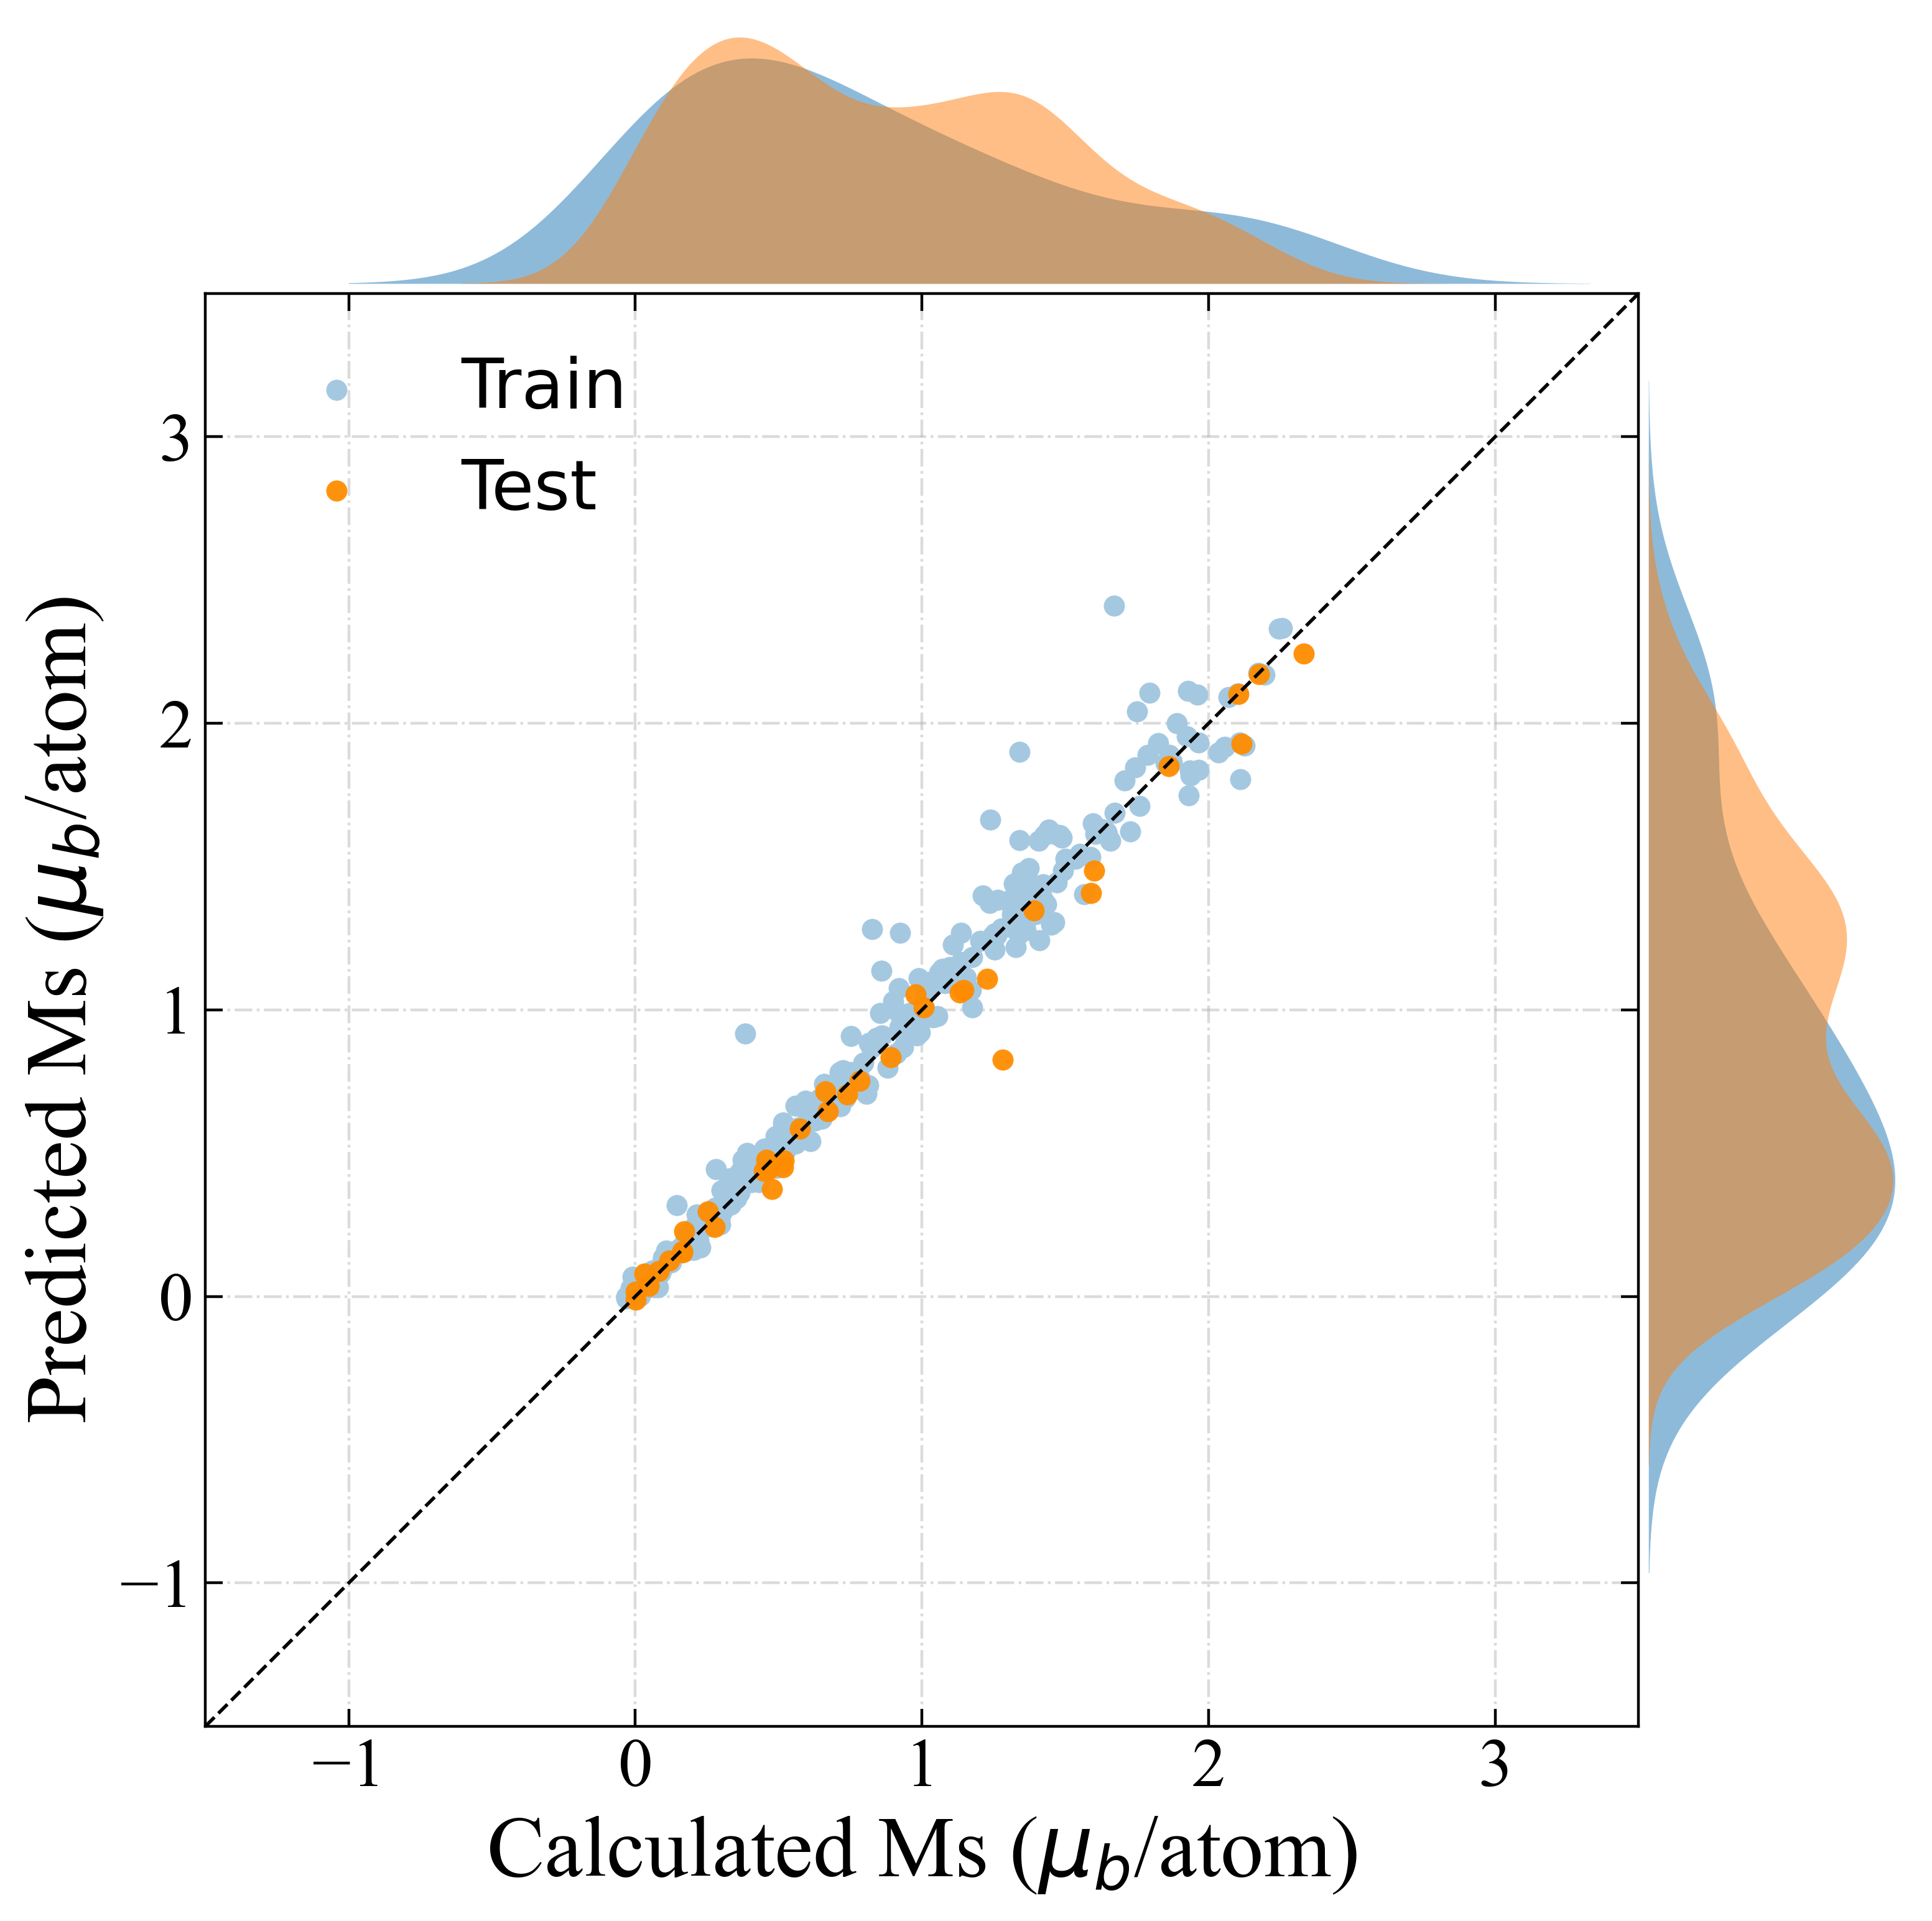

binwidth is 10
l_lim -20.0, r_lim 150.0


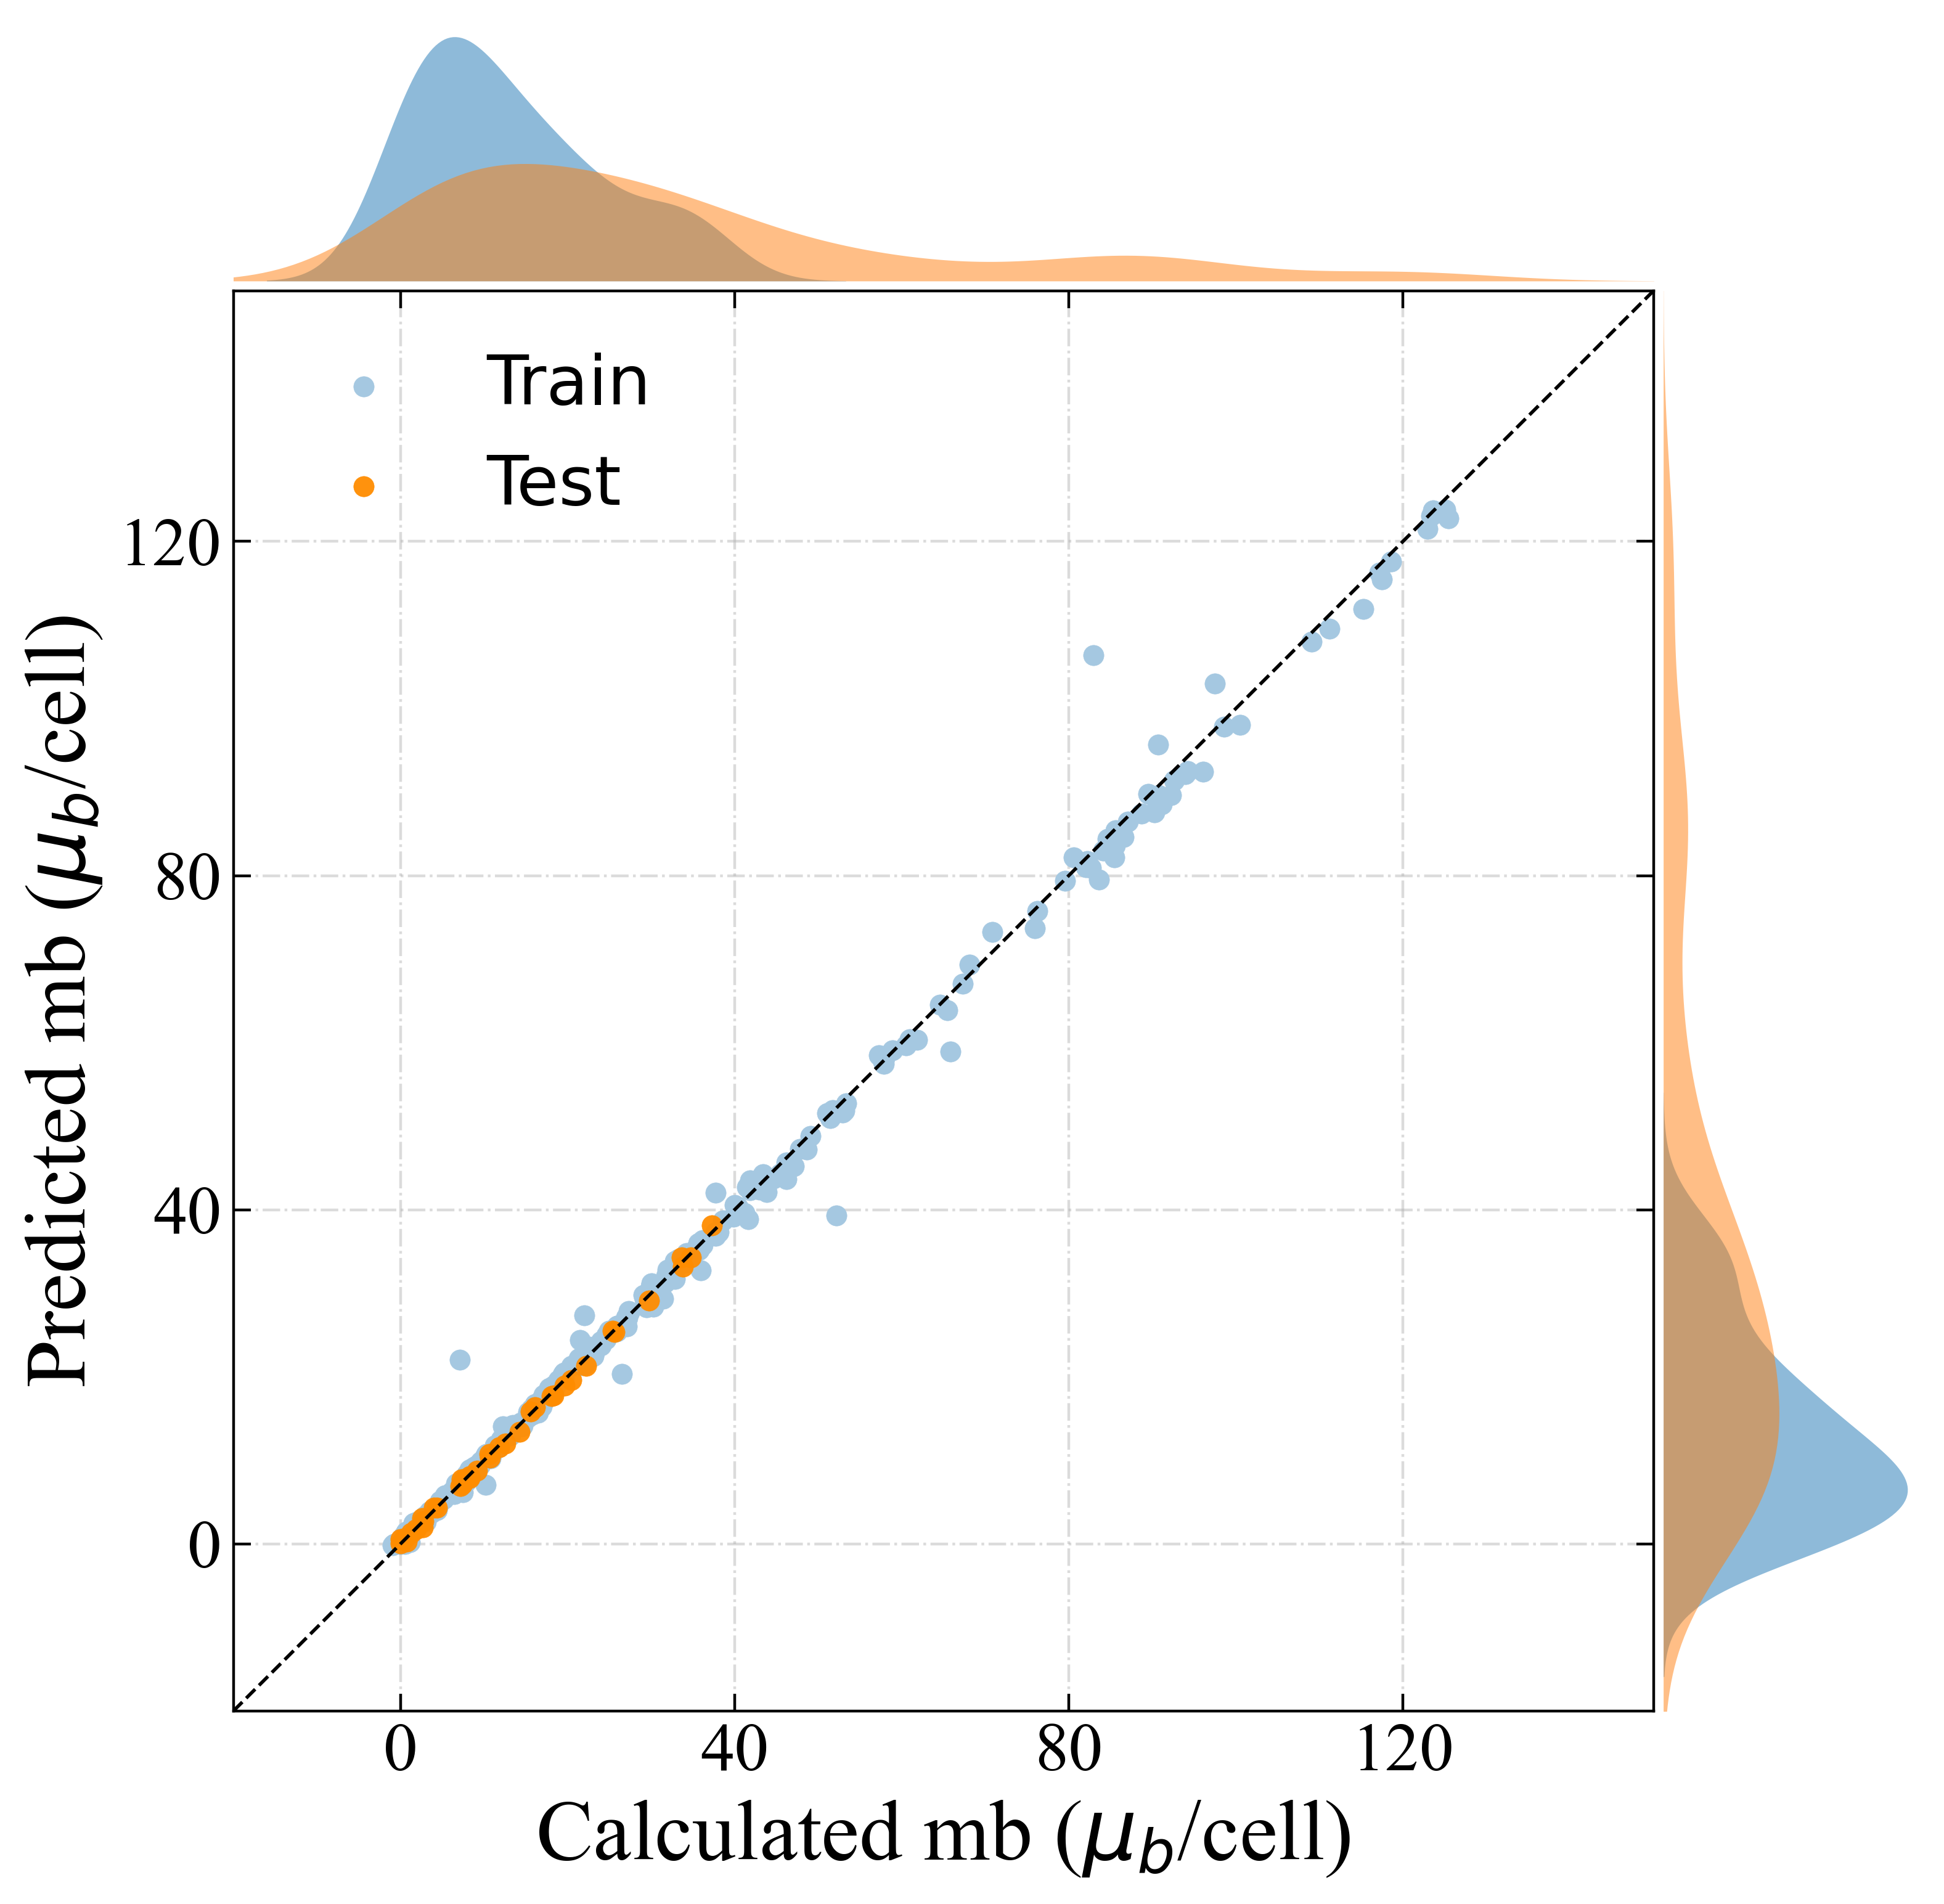

In [23]:
# out_true, out_pred,out_true_train, out_pred_train = evaluate_etot_emix_ef()
# fignames = ['fig1.png', 'fig2.png', 'fig3.png']
# plot_scatter(['etot', 'emix', 'eform'], out_true, out_pred,out_true_train, out_pred_train)
out_true, out_pred,out_true_train, out_pred_train = evaluate_ms_mb()
fignames = ['fig4.png', 'fig5.png']
plot_scatter(['ms', 'mb'], out_true, out_pred,out_true_train, out_pred_train)

loading (2+3+4+5) component HEA data with randomly splitting all the data into training/testing set	from D:\GitProjects\HEA_project\HEA_Data\Out_labels\Database.xlsx
The data size is 364
The number of the test size is 37
The number of the train size is 291, validation size is 36
the score of task 0 is 0.008654811419546604

mae in the test set is 0.008654811419546604
the score of task 0 is 0.009312991984188557

mae in the test set is 0.009312991984188557
binwidth is 0.2
l_lim -0.4, r_lim 1.4


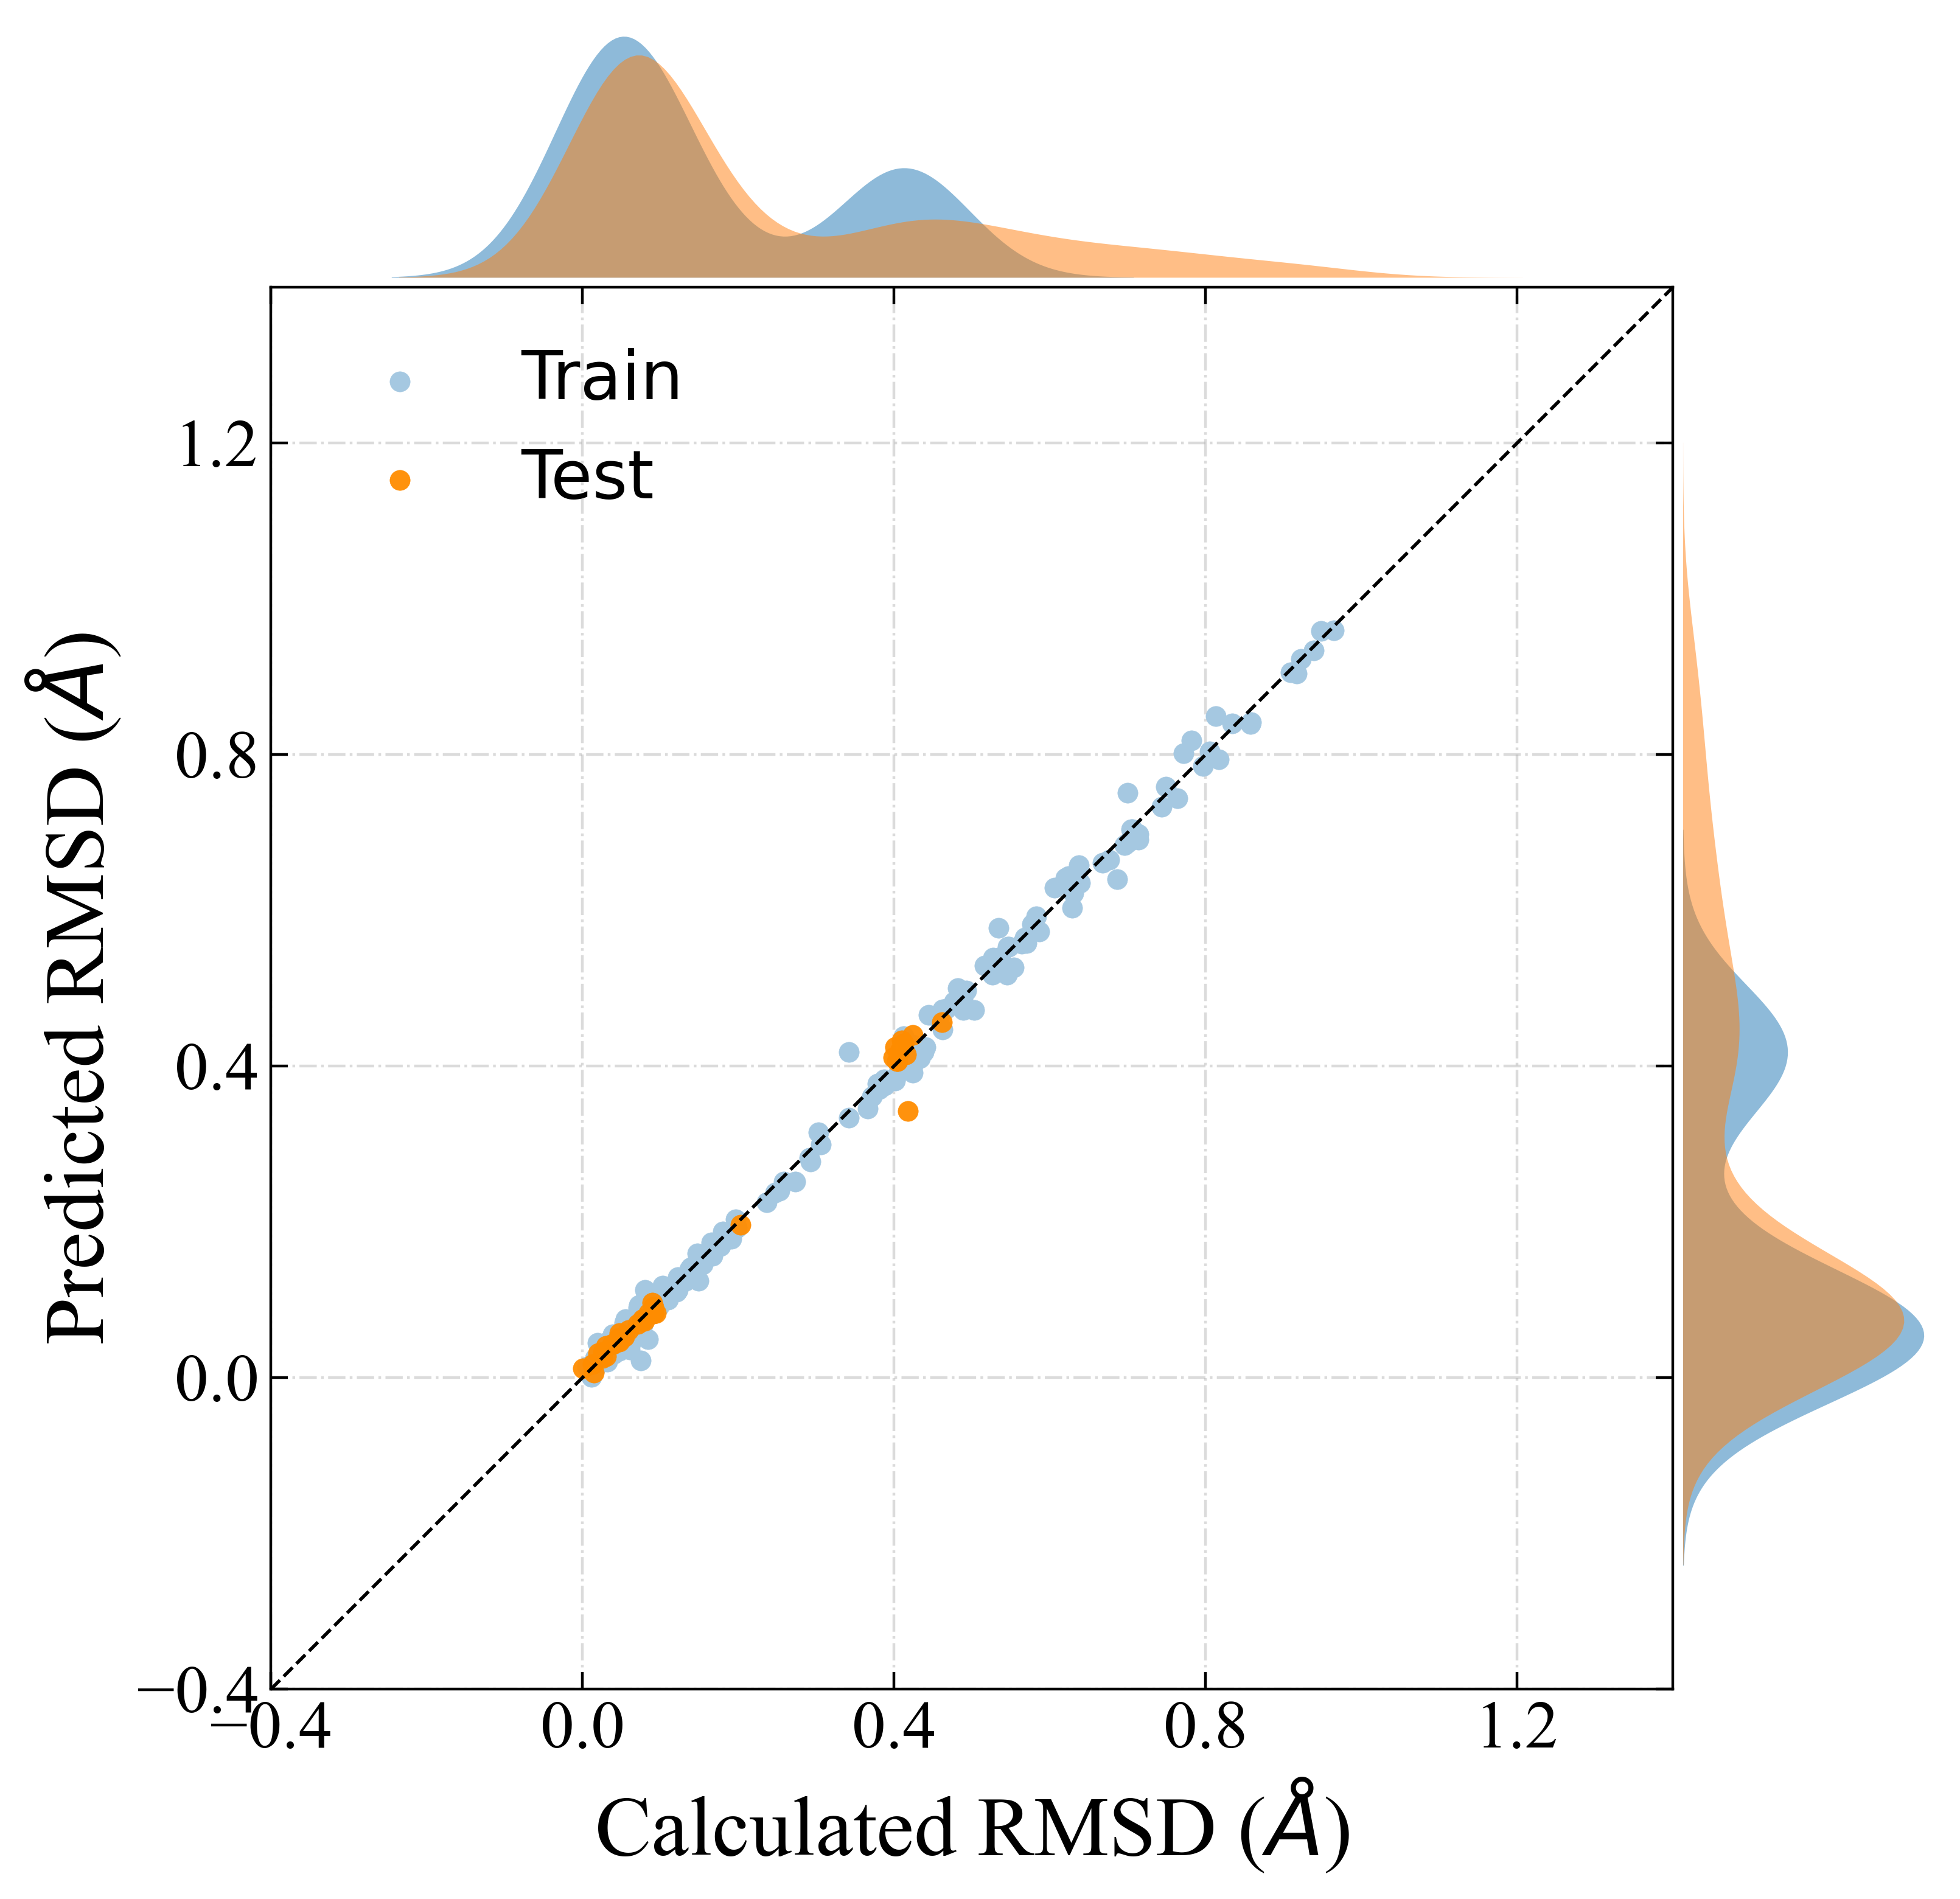

In [32]:
out_true, out_pred,out_true_train, out_pred_train = evaluate_rmsd()
fignames = ['fig6.png']
plot_scatter(['rmsd'], out_true, out_pred,out_true_train, out_pred_train)

In [ ]:
# out_true, out_pred,out_true_train, out_pred_train = evaluate_etot_emix_ef()

# def input_for_scatter(tasks, i):
#     mae_s = mean_absolute_error(out_true[i], out_pred[i])
#     r2_s = r2_score(out_true[i], out_pred[i])
#     out_pred[i] = np.squeeze(out_pred[i])
#     out_pred_train[i] = np.squeeze(out_pred_train[i])
#     return out_true[i], out_pred[i], out_true_train[i], out_pred_train[i], tasks[i]
    
# plt.subplot(131)
# a0, a1, b0, b1, c = input_for_scatter(['etot', 'emix', 'eform'], 0)
# scatter_hist(a0, a1, b0, b1, c)
# plt.subplot(132)
# a0, a1, b0, b1, c = input_for_scatter(['etot', 'emix', 'eform'], 1)
# scatter_hist(a0, a1, b0, b1, c)
# # plt.subplot(133)
# # a0, a1, b0, b1, c = input_for_scatter(['etot', 'emix', 'eform'], 2)
# # scatter_hist(a0, a1, b0, b1, c)
# plt.show()